# Demo: Fourier-Reihe

## Quelle

https://de.wikipedia.org/wiki/Fourierreihe

## Bibliotheken

In [1]:
import numpy as np
import matplotlib.pyplot as pl

## Integration mittels Trapezregel

In [2]:
def Integral (f, a, b, n):
    x = np.linspace (a, b, n + 1)
    y = f (x)
    dx = (b - a) / n
    return np.trapezoid (y, x, dx)

In [3]:
I = Integral (lambda x: x ** 2, 1, 2, 100)
print (I)

2.3333500000000003


## Fourier-Koeffizienten berechnen

In [4]:
def FourierKoeffizienten (f, m):
    n = m + 1
    c = np.zeros ((2, n))
    m = 1000
    for k in range (n):
        c [0, k] = Integral (lambda x: f (x) * np.cos (k * x), -np.pi, np.pi, m)
        c [1, k] = Integral (lambda x: f (x) * np.sin (k * x), -np.pi, np.pi, m)
    c /= np.pi; c [0, 0] /= 2
    return c

In [5]:
c = FourierKoeffizienten (lambda x: x ** 2, 3)
print (c)

[[ 3.28987471e+00 -4.00001316e+00  1.00001316e+00 -4.44457604e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.82715972e-16]]


## Fourier-Reihe berechnen

In [6]:
def FourierReihe (c, x):
    m = c.shape [1]; k = np.arange (m)
    n = x.shape [0]; y = np.zeros (n)
    for j in range (n):
        kx = k * x [j]
        y [j] += sum (c [0, :] * np.cos (kx))
        y [j] += sum (c [1, :] * np.sin (kx))
    return y

x = np.array ([-2, -1, 0, 1, 2])
print (x)
y = FourierReihe (c, x)
print (y)

[-2 -1  0  1  2]
[ 3.87406033  1.15251576 -0.15458289  1.15251576  3.87406033]


## Beispiele

In [7]:
def Beispiel (f, m):
    c = FourierKoeffizienten (f, m)
    #print (c)
    
    n = 1000
    x1 = np.linspace (-np.pi, np.pi, n + 1)
    x2 = np.linspace (- 2 * np.pi, 3 * np.pi, n + 1)
    x3 = np.arange (c.shape [1])
    
    pl.figure (figsize = (14, 5))
    pl.subplot (1, 2, 1)
    pl.title ('Funktion und Fourierreihe')
    pl.plot (x1, f (x1), color = 'blue', linewidth = 3)
    pl.plot (x2, FourierReihe (c, x2), color = 'red', linewidth = 1)
    
    pl.subplot (1, 2, 2)
    pl.title ('Spektrum')
    pl.bar (x3 - 0.2, c [0, :], width = 0.3, color = 'darkred')
    pl.bar (x3 + 0.2, c [1, :], width = 0.3, color = 'darkgreen')

### Beispiel 1: Gerade Funktion

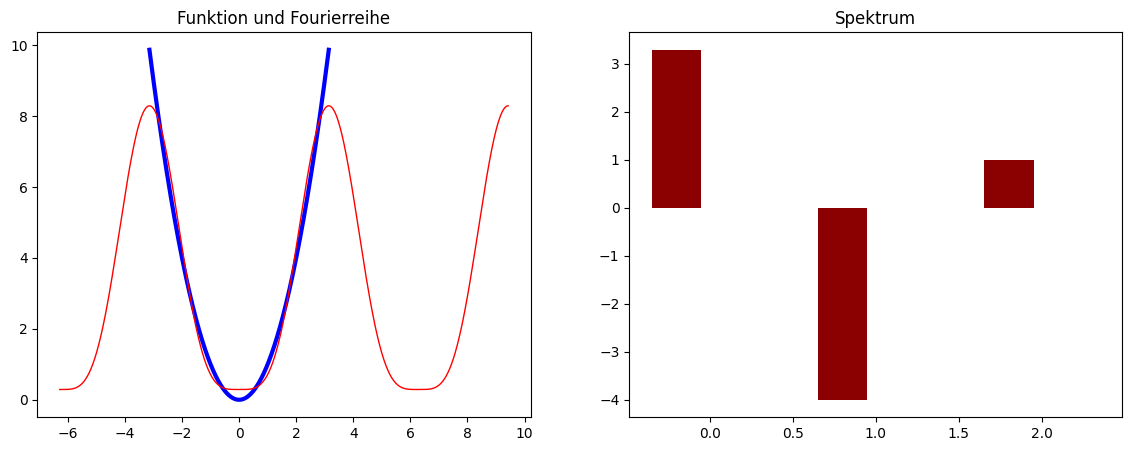

In [8]:
Beispiel (lambda x: x ** 2, 2)

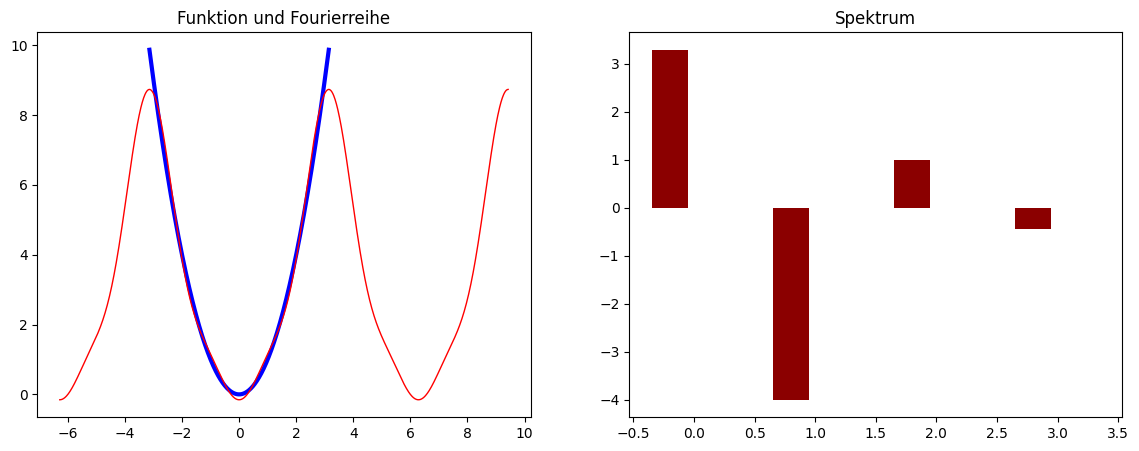

In [9]:
Beispiel (lambda x: x ** 2, 3)

### Beispiel 2: Ungerade Funktion

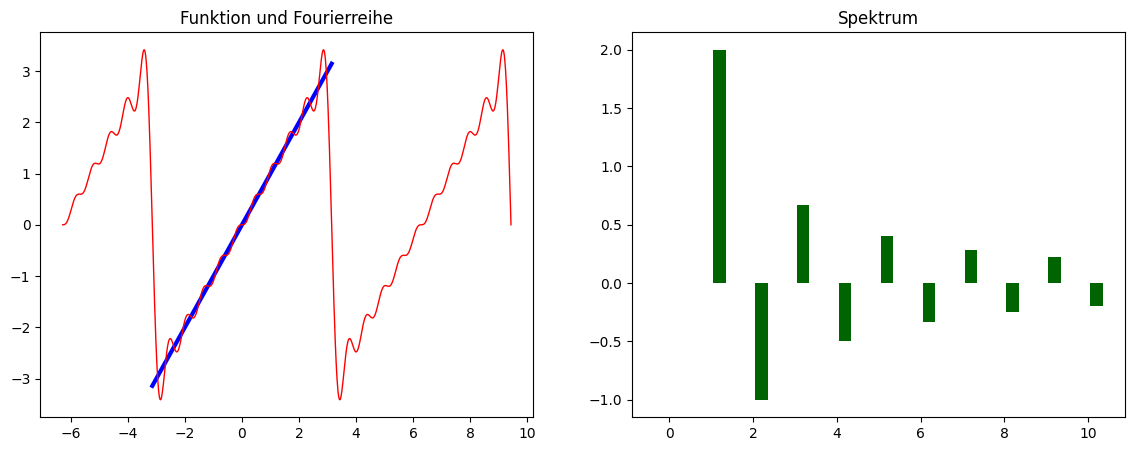

In [10]:
Beispiel (lambda x: x, 10)

### Beispiel 3: Allgemeiner Fall

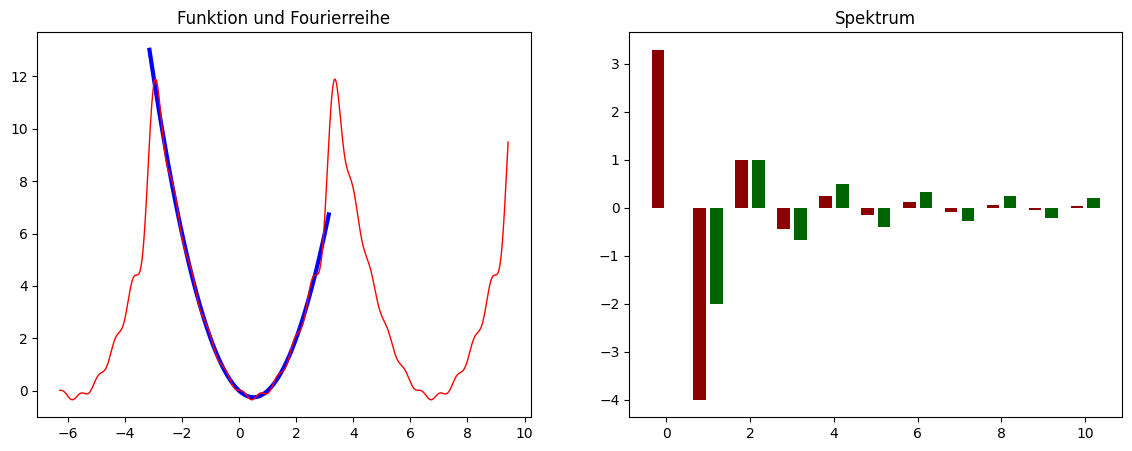

In [11]:
Beispiel (lambda x: x ** 2 - x, 10)